In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [19]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [20]:
# function to download all listings data
def get_listings_sicily_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Sicily')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/sicily_{date}.csv',index=False)
get_listings_sicily_timeseries()

In [21]:
# pull in detailed_listings
raw_df_sicily = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_sicily)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(sicily_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 48096 AirBnb listings.


In [22]:
sicily_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2020-12.csv')
sicily_raw_df_12_12_2020.shape





(49004, 16)

In [23]:
# use magic commands 'cd' to change directory
# use glob to locate all files for sicily
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_sicily = glob.glob('sicily/**.csv')
files_sicily

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


[]

In [24]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

sicily_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(sicily_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(sicily_raw_df_12_12_2020['price'].mean(),2)}.")

sicily_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(sicily_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_1_9_2021['price'].mean(),2)}.")

sicily_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(sicily_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_2_8_2021['price'].mean(),2)}.")

sicily_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(sicily_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_3_4_2021['price'].mean(),2)}.")

sicily_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(sicily_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_4_9_2021['price'].mean(),2)}.")

#sicily_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(sicily_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_5_19_2021['price'].mean(),2)}.")

#sicily_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-06.csv')
#print(f"The 6_3_2021 dataset contains {len(sicily_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_6_3_2021['price'].mean(),2)}.")

sicily_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(sicily_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_7_4_2021['price'].mean(),2)}.")

sicily_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(sicily_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_8_6_2021['price'].mean(),2)}.")

sicily_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(sicily_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_9_7_2021['price'].mean(),2)}.")

sicily_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(sicily_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_10_6_2021['price'].mean(),2)}.")

#sicily_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(sicily_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(sicily_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 49004 AirBnb listings; the avg price is €95.16.
The 1_9_2021 dataset contains 49235 AirBnb listings; the avg price is €95.01.
The 2_8_2021 dataset contains 49678 AirBnb listings; the avg price is €93.36.
The 3_4_2021 dataset contains 49659 AirBnb listings; the avg price is €93.21.
The 4_9_2021 dataset contains 50202 AirBnb listings; the avg price is €95.62.
The 7_4_2021 dataset contains 49266 AirBnb listings; the avg price is €122.97.
The 8_6_2021 dataset contains 47876 AirBnb listings; the avg price is €111.35.
The 9_7_2021 dataset contains 47925 AirBnb listings; the avg price is €99.32.
The 10_6_2021 dataset contains 48096 AirBnb listings; the avg price is €100.18.


In [28]:
df_list_sicily = [sicily_raw_df_12_12_2020, sicily_raw_df_1_9_2021, sicily_raw_df_2_8_2021,
           sicily_raw_df_3_4_2021, sicily_raw_df_4_9_2021,  sicily_raw_df_7_4_2021,
           sicily_raw_df_8_6_2021, sicily_raw_df_9_7_2021, sicily_raw_df_10_6_2021]

dates_sicily = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_sicily = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_sicily = []

def airbnb_parse_sicily(df_list, files):
    for file in files_sicily:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_{file}.csv")
        print(f"The {file} sicily dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_sicily(df_list, dates):
    for file in files_sicily:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/sicily/sicily_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_sicily.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_sicily)

sicily_parse = airbnb_parse_sicily(df_list_sicily, files_sicily)


The 2020-12 sicily dataset contains 49004 AirBnb listings -- the avg price is €95.16.
The 2021-01 sicily dataset contains 49235 AirBnb listings -- the avg price is €95.01.
The 2021-02 sicily dataset contains 49678 AirBnb listings -- the avg price is €93.36.
The 2021-03 sicily dataset contains 49659 AirBnb listings -- the avg price is €93.21.
The 2021-04 sicily dataset contains 50202 AirBnb listings -- the avg price is €95.62.
The 2021-07 sicily dataset contains 49266 AirBnb listings -- the avg price is €122.97.
The 2021-08 sicily dataset contains 47876 AirBnb listings -- the avg price is €111.35.
The 2021-09 sicily dataset contains 47925 AirBnb listings -- the avg price is €99.32.
The 2021-10 sicily dataset contains 48096 AirBnb listings -- the avg price is €100.18.


In [29]:
sicily_summary = airbnb_to_frame_sicily(df_list_sicily, files_sicily)
sicily_summary['Date of scrape'] = pd.to_datetime(sicily_summary['Date of scrape'])
sicily_summary['City'] = 'Sicily'
sicily_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,49004,95.16,60.0,0,10000,0.49,Sicily
1,2021-01-01,49235,95.01,60.0,0,10000,0.47,Sicily
2,2021-02-01,49678,93.36,60.0,0,10000,0.45,Sicily
3,2021-03-01,49659,93.21,60.0,9,21000,0.43,Sicily
4,2021-04-01,50202,95.62,63.0,9,21000,0.42,Sicily
5,2021-07-01,49266,122.97,80.0,9,21000,0.52,Sicily
6,2021-08-01,47876,111.35,76.0,7,9000,0.75,Sicily
7,2021-09-01,47925,99.32,67.0,9,9000,0.71,Sicily
8,2021-10-01,48096,100.18,65.0,9,9000,0.65,Sicily


In [30]:
master_df_sicily = pd.concat(df_list_sicily)
master_df_sicily_unique = master_df_sicily.drop_duplicates(subset='id')
master_df_sicily_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.84047,12.47778,Entire home/apt,150,3,28,2020-09-13,0.20,9,170,NaN,NaN
1,14561,Great panoramic apartment downtown,57243,Davide Erasmus,NaN,Palermo,38.11451,13.36469,Entire home/apt,82,2,60,2019-09-09,0.47,6,219,NaN,NaN
2,15782,B&B Mille e Una Notte,61786,B&B Mille E Una Notte,NaN,Agrigento,37.31097,13.57490,Private room,59,1,6,2019-08-15,0.05,3,312,NaN,NaN
3,22948,ROOM WITH BALCONY-NEAR STATION,88837,Giuseppe,NaN,Agrigento,37.30885,13.58582,Private room,25,1,263,2020-10-09,2.31,4,280,NaN,NaN
4,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.85172,15.28420,Entire home/apt,87,2,254,2020-11-08,2.01,5,0,NaN,NaN


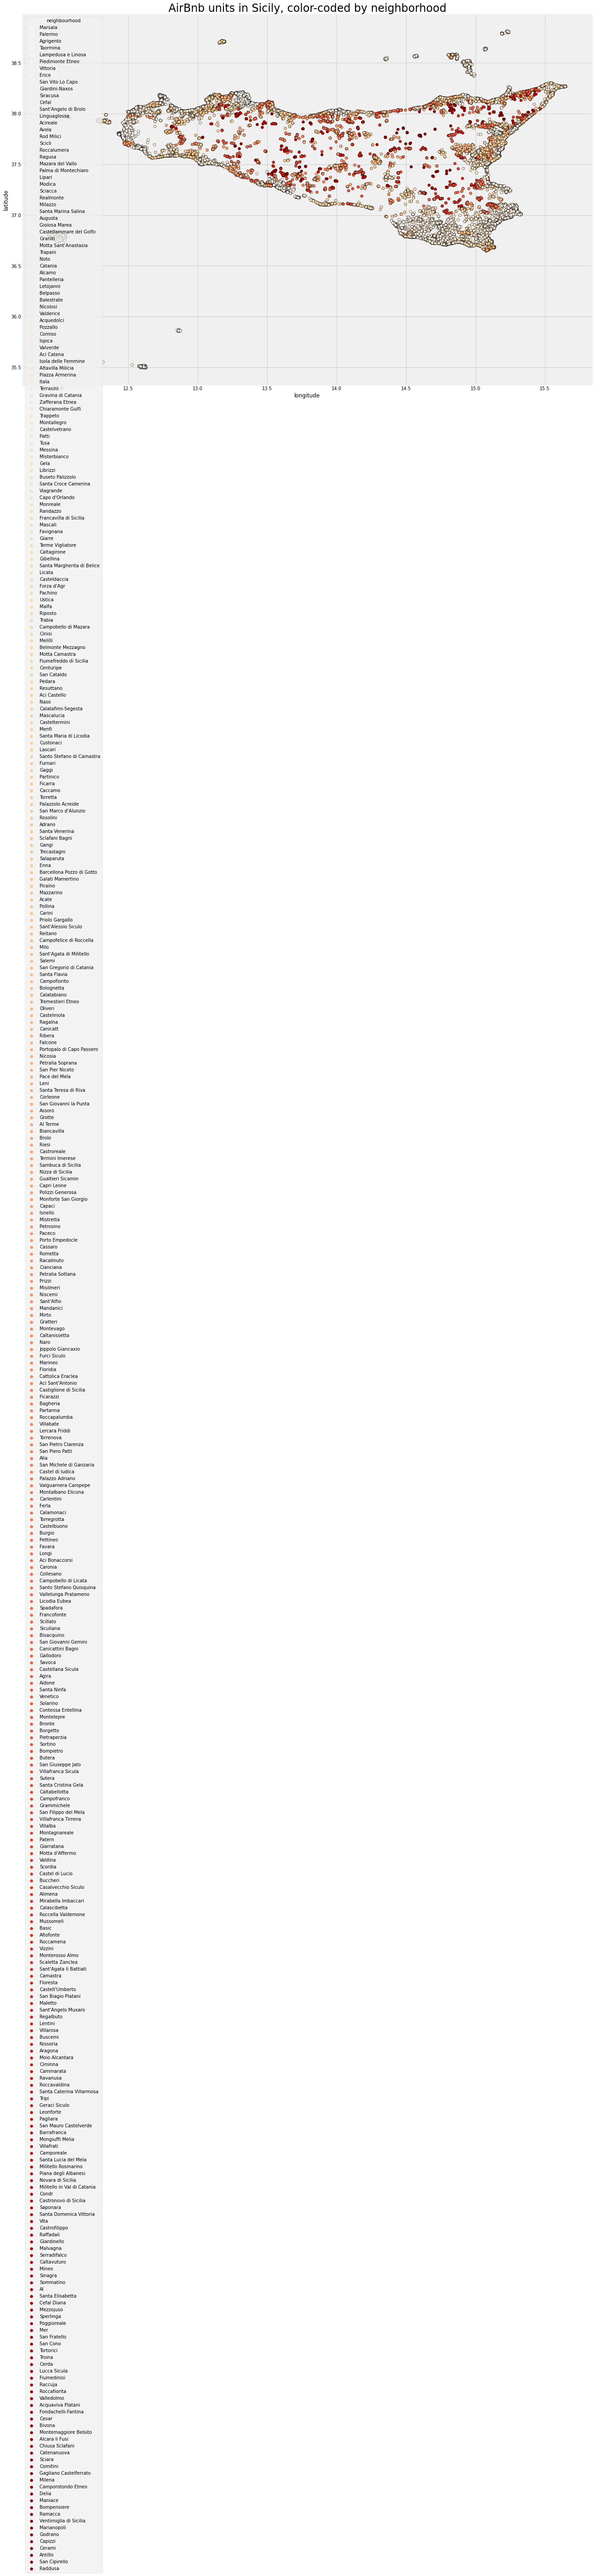

In [31]:
title = 'AirBnb units in Sicily, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_sicily_unique.longitude, master_df_sicily_unique.latitude, hue = master_df_sicily_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_sicily.png')
plt.show()

## Add review data through a join

In [32]:
df_reviews = pd.concat([sicily_raw_df_10_6_2021,raw_df_sicily],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.840470,12.47778,Entire home/apt,180,...,4.67,4.85,4.81,4.70,4.59,4.56,t,9,0,0
1,22948,B&B NEAR STATION ROOM WITH BALCONY,88837,Giuseppe,NaN,Agrigento,37.308850,13.58582,Private room,24,...,4.86,4.87,4.84,4.77,4.87,4.83,t,0,3,0
2,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.851720,15.28420,Entire home/apt,66,...,4.65,4.73,4.65,4.74,4.84,4.61,t,5,0,0
3,35264,Etna-sea a panoramic villa,151644,Serena,NaN,Piedimonte Etneo,37.824640,15.15739,Entire home/apt,62,...,4.83,4.83,4.89,4.80,4.85,4.76,f,4,0,0
4,40182,Casa Vacanze Hipparis,172482,Francesco,NaN,Vittoria,36.891010,14.43056,Entire home/apt,47,...,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,0
5,43992,Flat in front of the beach!!!,192525,Gabriele,NaN,Erice,38.032880,12.53485,Entire home/apt,55,...,4.76,4.53,4.96,4.91,4.33,4.58,f,2,0,0
6,43995,Holidays Villa-600mt from the beach,192525,Gabriele,NaN,San Vito Lo Capo,38.169040,12.74028,Entire home/apt,66,...,4.83,4.62,4.98,4.89,4.70,4.68,f,2,0,0
7,44672,Penthouse in Ortigia with Amazing Spacious Terrace,196573,Francesco,NaN,Siracusa,37.060290,15.29407,Entire home/apt,96,...,4.80,4.83,4.79,4.84,4.96,4.79,f,4,0,0
8,45304,Vecchia Girgenti - Holiday Apartment - Short Lets,200638,Antonio,NaN,Agrigento,37.309460,13.58681,Entire home/apt,27,...,4.86,4.76,4.93,4.93,4.68,4.72,t,1,0,0
9,45305,Luxury apartment in Vucciria area,57243,Davide Erasmus,NaN,Palermo,38.112990,13.36489,Private room,12,...,4.48,3.76,4.84,4.96,4.60,4.68,t,2,2,0


## Regression

In [33]:
#df_reviews_.columns

In [34]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [35]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -33.56723904673977
Coefficients:  [  7.70212886  47.51448598  -7.77753795  -0.11657583  -1.29863026
   0.50055631   5.40331727  15.29023837 -11.24688835]
LinearRegression()


In [36]:
y_pred2 = regr.predict(X_)

In [37]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
34660,400,44.990839,-355.009161
34981,398,52.686043,-345.313957
13244,400,55.400330,-344.599670
36473,400,61.203083,-338.796917
31651,393,56.643000,-336.357000


<function matplotlib.pyplot.ylim(*args, **kwargs)>

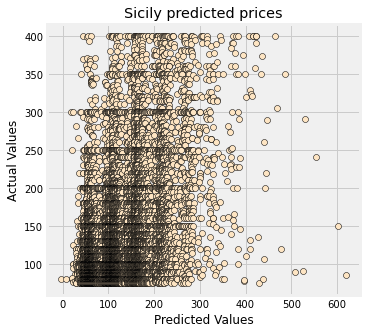

In [38]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Sicily predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim